In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Read Data

In [2]:
#impoting the datasset
df=pd.read_excel('ExampleOilMeasurementDaily 2.xlsx')
df


,Oil,2018-10-01 00:00:00,1329.6
0,Oil,2018-10-02,1435.2
1,Oil,2018-10-03,1372.1
2,Oil,2018-10-04,1371.7
3,Oil,2018-10-05,1200.0
4,Oil,2018-10-06,978.7
...,...,...,...
1261,Oil,2022-04-07,110.8
1262,Oil,2022-04-08,97.2
1263,Oil,2022-04-09,119.9
1264,Oil,2022-04-10,114.1


In [3]:
# bringing the column down
df = pd.DataFrame(np.vstack([df.columns, df]))
df

,0,1,2
0,Oil,2018-10-01,1329.6
1,Oil,2018-10-02,1435.2
2,Oil,2018-10-03,1372.1
3,Oil,2018-10-04,1371.7
4,Oil,2018-10-05,1200.0
...,...,...,...
1262,Oil,2022-04-07,110.8
1263,Oil,2022-04-08,97.2
1264,Oil,2022-04-09,119.9
1265,Oil,2022-04-10,114.1


In [4]:
#setting column names
df.columns = ['type', 'date', 'production']
df

,type,date,production
0,Oil,2018-10-01,1329.6
1,Oil,2018-10-02,1435.2
2,Oil,2018-10-03,1372.1
3,Oil,2018-10-04,1371.7
4,Oil,2018-10-05,1200.0
...,...,...,...
1262,Oil,2022-04-07,110.8
1263,Oil,2022-04-08,97.2
1264,Oil,2022-04-09,119.9
1265,Oil,2022-04-10,114.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        1267 non-null   object        
 1   date        1267 non-null   datetime64[ns]
 2   production  1267 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 29.8+ KB


No null values--
date in in the right datatype--
production is object datatype--

since the production value is in object datatype we convert it to float

In [6]:
#converting the production object data to numerical
df['production']= df.production.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   type        1267 non-null   object        
 1   date        1267 non-null   datetime64[ns]
 2   production  1267 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 29.8+ KB


production is now converted to float

In [7]:
#checking the unique values in the first column
df['type'].unique() 

array(['Oil'], dtype=object)

Since the type column has only oil as data, the column can be removed

In [8]:
df = df.drop('type',axis =1)

In [9]:
#setting date column as index
df = df.set_index('date')

Text(0.5, 0, 'Date')

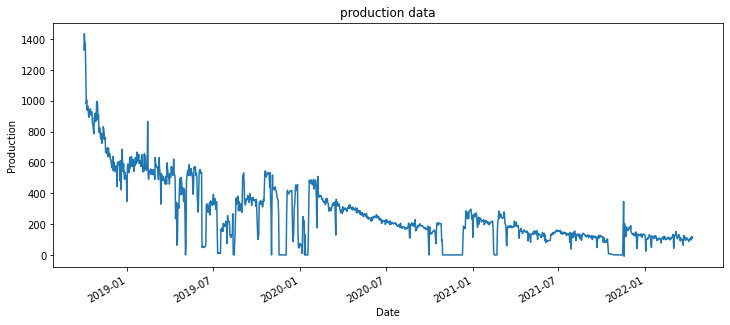

In [10]:
# Plotting the production Data
ax= df['production'].plot(figsize=(12,5))
plt.title('production data')
ax. set_ylabel('Production')
ax.set_xlabel('Date')

## Checking For Stationarity Using ADF test

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [12]:
adf_test(df['production'])

1. ADF :  -4.0158335832858265
2. P-Value :  0.0013298339815517844
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1256
5. Critical Values :
	 1% :  -3.4355671297788666
	 5% :  -2.8638438984080117
	 10% :  -2.5679966213893057


Since the p value is less than 0.05, we can conclude the data is stationary 

## Figuring Out Order for ARIMA Model

In [13]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [14]:
# Using Auto arima function to find the best order for fit
stepwise_fit = auto_arima(df['production'], trace =True, suppress_warnings=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13817.469, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13878.016, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13861.387, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13856.259, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13876.365, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13814.938, Time=0.73 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=13843.230, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13814.599, Time=0.44 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13815.120, Time=0.75 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=13847.437, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=13815.491, Time=0.19 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.614 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1267
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -6903.299
Date:                Mon, 25 Jul 2022   AIC                          13814.599
Time:                        22:03:53   BIC                          13835.173
Sample:                             0   HQIC                         13822.328
                               - 1267                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1483      0.093     -1.602      0.109      -0.330       0.033
ar.L1          0.8077      0.017     47.369      0.000       0.774       0.841
ma.L1         -0.9479      0.012    -82.127      0.000      -0.970      -0.925
sigma2      3189.1241     53.842     59.231      0.000    3083.595    3294.653
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):              9380.82
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best model is  ARIMA(1,1,1) 

In [15]:
#importing model from the librabry
from statsmodels.tsa.arima_model import ARIMA

In [16]:
#fitting the ARIMA  model 
model=ARIMA(df['production'],order=(1,1,1))
model=model.fit()


In [17]:
#checking the last date of production data available
df.tail()

,production
date,
2022-04-07,110.8
2022-04-08,97.2
2022-04-09,119.9
2022-04-10,114.1
2022-04-11,109.9


In [18]:
#Indexing the future dates - next week
index_future_dates=pd.date_range(start='2022-04-12',end='2022-04-19')

#Giving index number on where to start and end the prediction
pred=model.predict(start=len(df),end=len(df)+7,typ='levels').rename('ARIMA Predictions')

#predicting the future dates production (for a week)
pred.index=index_future_dates

print(pred)

2022-04-12    106.580953
2022-04-13    103.751743
2022-04-14    101.318153
2022-04-15     99.204088
2022-04-16     97.348088
2022-04-17     95.700516
2022-04-18     94.221282
2022-04-19     92.878007
Freq: D, Name: ARIMA Predictions, dtype: float64


## Exponential smoothening method

In [19]:
#importing the model from library
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [20]:
#fitting the simple exponential smoothing  model 
model = SimpleExpSmoothing(df['production'])
SES= model.fit(smoothing_level = 0.2,optimized = False)
print(SES.params, '\n \n',SES.summary())

{'smoothing_level': 0.2, 'smoothing_trend': None, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 1329.6, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False} 
 
                        SimpleExpSmoothing Model Results                       
Dep. Variable:             production   No. Observations:                 1267
Model:             SimpleExpSmoothing   SSE                        6939624.510
Optimized:                      False   AIC                          10910.781
Trend:                           None   BIC                          10921.070
Seasonal:                        None   AICC                         10910.812
Seasonal Periods:                None   Date:                 Mon, 25 Jul 2022
Box-Cox:                        False   Time:                         22:03:53
Box-Cox Coeff.:                  None                                         
                       coeff       

In [21]:
#Indexing the future dates - next week
index_future_dates=pd.date_range(start='2022-04-12',end='2022-04-12')

#predicting the future date production 
Next_day_pred = SES.predict(len(df.production),len(df.production))

#setting index for the ned day prediction
Next_day_pred.index = index_future_dates
print('The next day prediction is \n',Next_day_pred)

The next day prediction is 
 2022-04-12    107.636558
Freq: D, dtype: float64
